# Flight Price Prediction
---

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [190]:
#train_data = pd.read_excel(r"/content/sample_data/Data_Train.xlsx")

#For Data Set 2 DWH

train_data = pd.read_excel(r"/content/sample_data/DataSet2_DWH/Data_Train2.xlsx")

In [191]:
pd.set_option('display.max_columns', None)

In [192]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,21:50,19:00 13 Jun,21h 10m,1 stop,In-flight meal not included,14011
1,Jet Airways,9/04/2019,Banglore,Delhi,BLR → DEL,17:45,20:45,3h,non-stop,No info,5830
2,Jet Airways,1/03/2019,Mumbai,Hyderabad,BOM → HYD,19:35,21:05,1h 30m,non-stop,No info,10262
3,Jet Airways,18/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 19 May,19h 55m,2 stops,No info,13381
4,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,04:40 19 May,12h 10m,1 stop,In-flight meal not included,12898


In [193]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          147 non-null    object
 1   Date_of_Journey  147 non-null    object
 2   Source           147 non-null    object
 3   Destination      147 non-null    object
 4   Route            147 non-null    object
 5   Dep_Time         147 non-null    object
 6   Arrival_Time     147 non-null    object
 7   Duration         147 non-null    object
 8   Total_Stops      147 non-null    object
 9   Additional_Info  147 non-null    object
 10  Price            147 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 12.8+ KB


In [194]:
train_data.dropna(inplace = True)

In [195]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

## EDA

In [196]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [197]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [198]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,21:50,19:00 13 Jun,21h 10m,1 stop,In-flight meal not included,14011,12,6
1,Jet Airways,9/04/2019,Banglore,Delhi,BLR → DEL,17:45,20:45,3h,non-stop,No info,5830,9,4
2,Jet Airways,1/03/2019,Mumbai,Hyderabad,BOM → HYD,19:35,21:05,1h 30m,non-stop,No info,10262,1,3
3,Jet Airways,18/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 19 May,19h 55m,2 stops,No info,13381,18,5
4,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,04:40 19 May,12h 10m,1 stop,In-flight meal not included,12898,18,5


In [199]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [200]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [201]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 13 Jun,21h 10m,1 stop,In-flight meal not included,14011,12,6,21,50
1,Jet Airways,Banglore,Delhi,BLR → DEL,20:45,3h,non-stop,No info,5830,9,4,17,45
2,Jet Airways,Mumbai,Hyderabad,BOM → HYD,21:05,1h 30m,non-stop,No info,10262,1,3,19,35
3,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,19:00 19 May,19h 55m,2 stops,No info,13381,18,5,23,5
4,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,04:40 19 May,12h 10m,1 stop,In-flight meal not included,12898,18,5,16,30


In [202]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [203]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21h 10m,1 stop,In-flight meal not included,14011,12,6,21,50,19,0
1,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,5830,9,4,17,45,20,45
2,Jet Airways,Mumbai,Hyderabad,BOM → HYD,1h 30m,non-stop,No info,10262,1,3,19,35,21,5
3,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,No info,13381,18,5,23,5,19,0
4,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,12898,18,5,16,30,4,40


In [204]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [205]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [206]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [207]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,14011,12,6,21,50,19,0,21,10
1,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,5830,9,4,17,45,20,45,3,0
2,Jet Airways,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,10262,1,3,19,35,21,5,1,30
3,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,13381,18,5,23,5,19,0,19,55
4,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1 stop,In-flight meal not included,12898,18,5,16,30,4,40,12,10


---

In [208]:
train_data["Airline"].value_counts()

Jet Airways          62
IndiGo               29
Air India            25
Multiple carriers    13
SpiceJet              8
Vistara               5
GoAir                 3
Air Asia              2
Name: Airline, dtype: int64

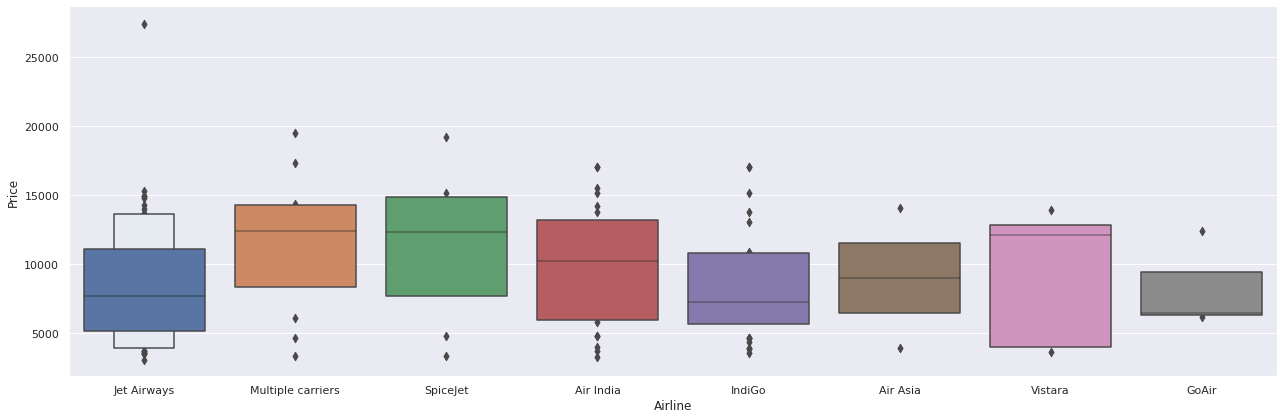

In [209]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [210]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [211]:
train_data["Source"].value_counts()

Delhi       64
Kolkata     40
Banglore    29
Mumbai      12
Chennai      2
Name: Source, dtype: int64

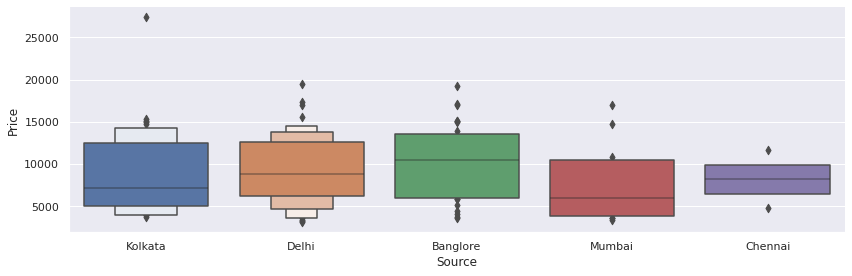

In [212]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [213]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0


In [214]:
train_data["Destination"].value_counts()

Cochin       64
Banglore     40
Delhi        18
Hyderabad    12
New Delhi    11
Kolkata       2
Name: Destination, dtype: int64

In [215]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,0,0,0


In [216]:
train_data["Route"]

0            DEL → BOM → COK
1                  BLR → DEL
2                  BOM → HYD
3      DEL → AMD → BOM → COK
4            CCU → BOM → BLR
               ...          
142                BLR → DEL
143                DEL → COK
144                BOM → HYD
145          DEL → BOM → COK
146                MAA → CCU
Name: Route, Length: 147, dtype: object

In [217]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [218]:
train_data["Total_Stops"].value_counts()

1 stop      83
non-stop    42
2 stops     22
Name: Total_Stops, dtype: int64

In [219]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [220]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,14011,12,6,21,50,19,0,21,10
1,Jet Airways,Banglore,Delhi,0,5830,9,4,17,45,20,45,3,0
2,Jet Airways,Mumbai,Hyderabad,0,10262,1,3,19,35,21,5,1,30
3,Jet Airways,Delhi,Cochin,2,13381,18,5,23,5,19,0,19,55
4,Jet Airways,Kolkata,Banglore,1,12898,18,5,16,30,4,40,12,10


In [221]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [222]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,14011,12,6,21,50,19,0,21,10,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,Jet Airways,Banglore,Delhi,0,5830,9,4,17,45,20,45,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,Jet Airways,Mumbai,Hyderabad,0,10262,1,3,19,35,21,5,1,30,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,Jet Airways,Delhi,Cochin,2,13381,18,5,23,5,19,0,19,55,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,Jet Airways,Kolkata,Banglore,1,12898,18,5,16,30,4,40,12,10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [223]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [224]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,14011,12,6,21,50,19,0,21,10,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,0,5830,9,4,17,45,20,45,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,10262,1,3,19,35,21,5,1,30,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,2,13381,18,5,23,5,19,0,19,55,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,1,12898,18,5,16,30,4,40,12,10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [225]:
data_train.shape

(147, 26)

---

## Test set

In [226]:
#test_data = pd.read_excel(r"/content/sample_data/Test_set.xlsx")

# Test data  For Task 02 DWH

test_data = pd.read_excel(r"/content/sample_data/DataSet2_DWH/Data_Test2.xlsx")

In [227]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,9/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 10 Mar,6h 35m,1 stop,In-flight meal not included
1,IndiGo,12/06/2019,Delhi,Cochin,DEL → HYD → COK,06:50,22:30,15h 40m,1 stop,No info
2,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → DEL → BLR,17:00,22:05 19 May,29h 5m,1 stop,No info
3,Air India,6/06/2019,Kolkata,Banglore,CCU → JAI → DEL → BLR,08:20,23:15,14h 55m,2 stops,No info
4,Jet Airways,15/05/2019,Kolkata,Banglore,CCU → BOM → BLR,18:55,04:40 16 May,9h 45m,1 stop,No info


In [228]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          570 non-null    object
 1   Date_of_Journey  570 non-null    object
 2   Source           570 non-null    object
 3   Destination      570 non-null    object
 4   Route            570 non-null    object
 5   Dep_Time         570 non-null    object
 6   Arrival_Time     570 non-null    object
 7   Duration         570 non-null    object
 8   Total_Stops      570 non-null    object
 9   Additional_Info  570 non-null    object
dtypes: object(10)
memory usage: 44.7+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0

In [229]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,9,3,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,6,6,50,22,30,15,40,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,18,5,17,0,22,5,29,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,6,6,8,20,23,15,14,55,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,15,5,18,55,4,40,9,45,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


---

In [230]:
data_train.shape

(147, 26)

In [231]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [233]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways',
       'Airline_Multiple carriers',
        'Airline_SpiceJet',
        'Airline_Vistara', 
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,12,6,21,50,19,0,21,10,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,0,9,4,17,45,20,45,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,3,19,35,21,5,1,30,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,2,18,5,23,5,19,0,19,55,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,1,18,5,16,30,4,40,12,10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [234]:
y = data_train.iloc[:, 1]
y.head()

0    14011
1     5830
2    10262
3    13381
4    12898
Name: Price, dtype: int64

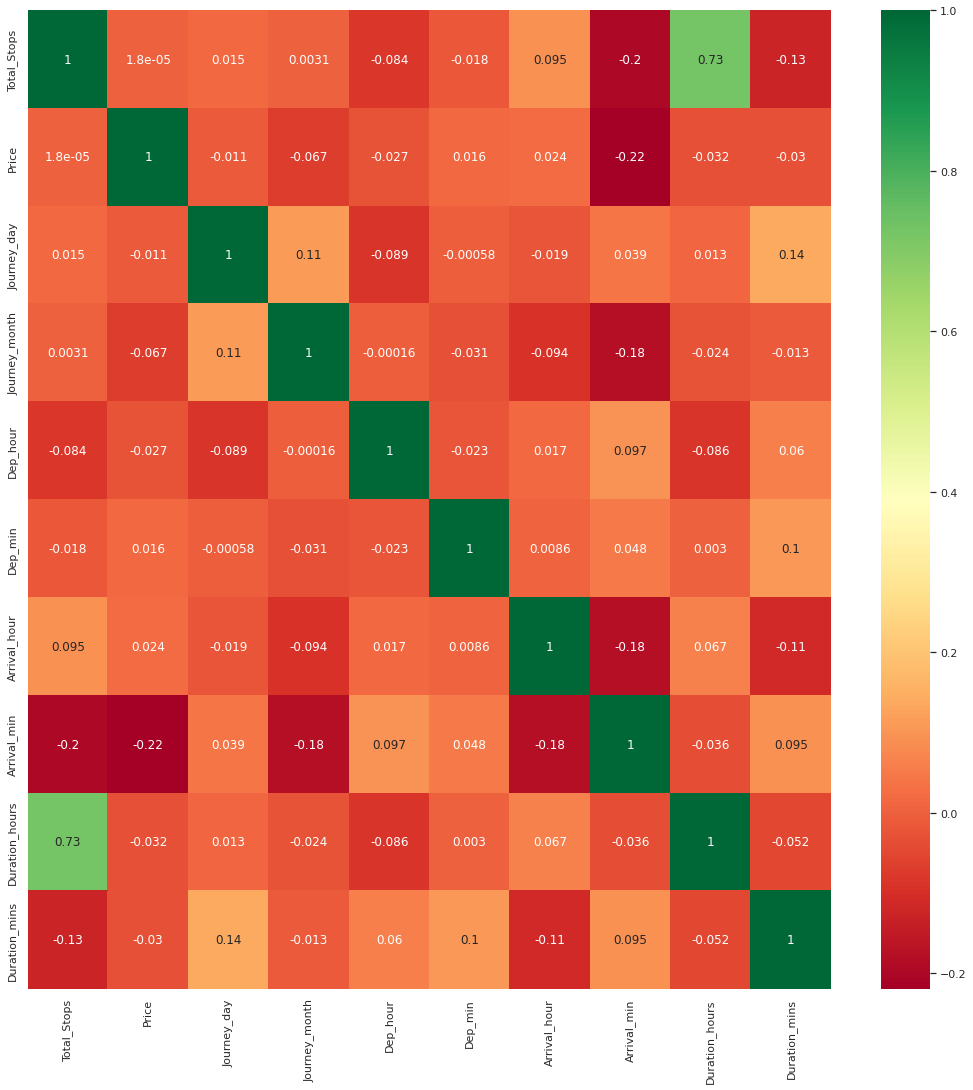

In [235]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [236]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [237]:
print(selection.feature_importances_)

[0.02395714 0.12421919 0.09230172 0.10001264 0.08132808 0.09331723
 0.0962525  0.07361811 0.06323623 0.01993764 0.00377806 0.02219125
 0.01961035 0.0192007  0.01688993 0.01734043 0.0020087  0.01601527
 0.03585007 0.00590592 0.01263478 0.01846524 0.00777448 0.00064344
 0.0335109 ]


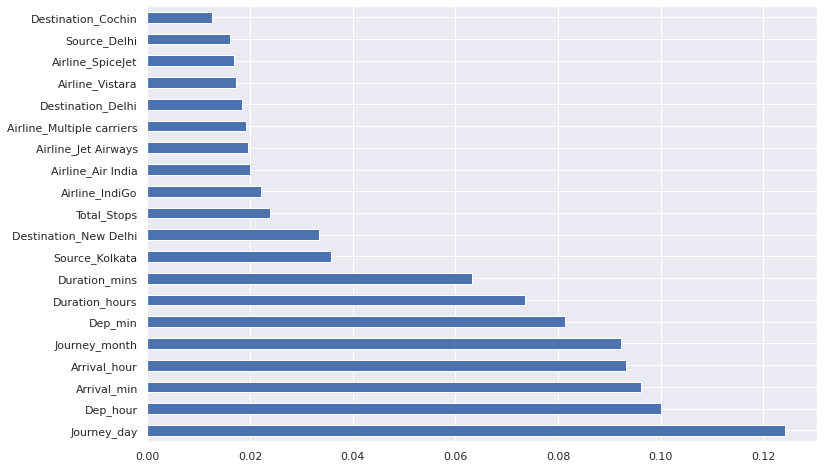

In [238]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


---

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [241]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [242]:
y_pred = reg_rf.predict(X_test)

In [243]:
reg_rf.score(X_train, y_train)

0.8294867145710045

In [244]:
reg_rf.score(X_test, y_test)

0.09888087664296874

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


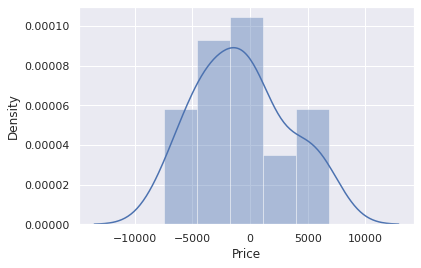

In [245]:
sns.distplot(y_test-y_pred)
plt.show()

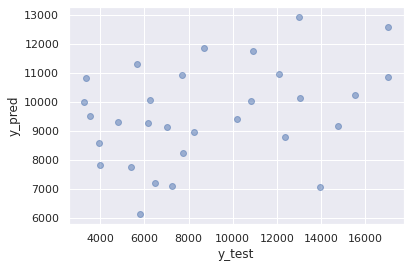

In [246]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [247]:
from sklearn import metrics

In [248]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3253.3920000000003
MSE: 15705658.56726667
RMSE: 3963.0365336780164


In [249]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.08592482120838472

In [250]:
metrics.r2_score(y_test, y_pred)

0.09888087664296874

---

In [251]:
from sklearn.model_selection import RandomizedSearchCV

In [252]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [253]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [254]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [255]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [256]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 100,
 'n_estimators': 300}

In [257]:
prediction = rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


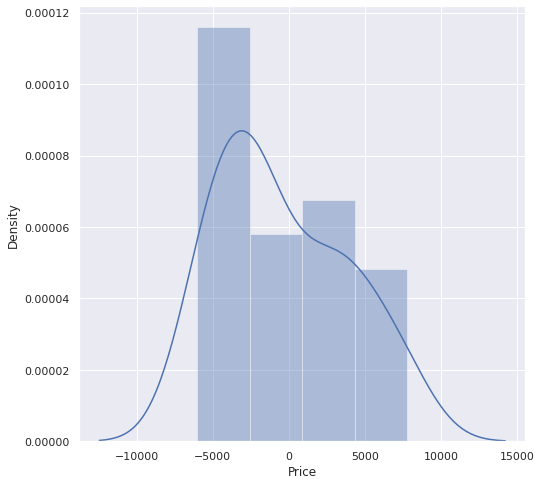

In [258]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

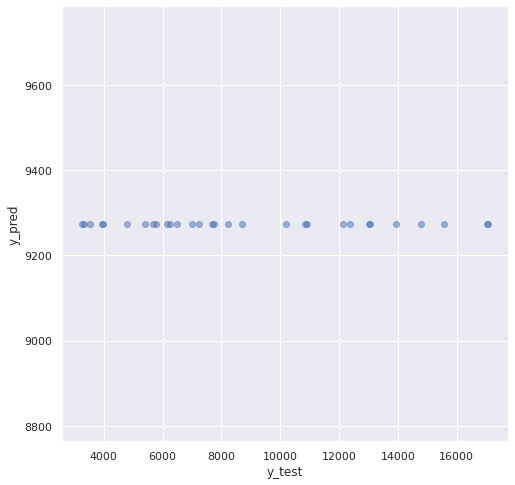

In [259]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [260]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction))) #root-mean-square-deviation

MAE: 3711.434022792025
MSE: 17592682.26109451
RMSE: 4194.363153220583


---